<a href="https://colab.research.google.com/github/AabidMK/RealtyAI_Infosys_Internship_Aug2025/blob/main/Time_Series_Fore_Casting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('State_time_series.csv')
df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df['Date'].dtype)
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

object
datetime64[ns]


In [ ]:
df_mv = df[['Date', 'RegionName', 'ZHVI_AllHomes']].copy()
display(df_mv.head())

,Date,RegionName,ZHVI_AllHomes
0,1996-04-30,Alabama,79500.0
1,1996-04-30,Arizona,103600.0
2,1996-04-30,Arkansas,64400.0
3,1996-04-30,California,157900.0
4,1996-04-30,Colorado,128100.0


In [ ]:
print("Missing values before handling:")
print(df_mv.isnull().sum())
df_mv['ZHVI_AllHomes'] = df_mv['ZHVI_AllHomes'].ffill()
print("\nMissing values after handling:")
print(df_mv.isnull().sum())

Missing values before handling:
Date               0
RegionName         0
ZHVI_AllHomes    774
dtype: int64

Missing values after handling:
Date             0
RegionName       0
ZHVI_AllHomes    0
dtype: int64


In [ ]:
df_mv = df_mv.sort_values(by=['RegionName', 'Date'])
df_mv['Rolling_Median_ZHVI'] = df_mv.groupby('RegionName')['ZHVI_AllHomes'].transform(lambda x: x.rolling(window=3, center=True).median())
display(df_mv.head())

,Date,RegionName,ZHVI_AllHomes,Rolling_Median_ZHVI
0,1996-04-30,Alabama,79500.0,NaN
44,1996-05-31,Alabama,79200.0,79500.0
90,1996-06-30,Alabama,79500.0,79500.0
136,1996-07-31,Alabama,79700.0,79700.0
182,1996-08-31,Alabama,79700.0,79700.0


In [ ]:
df_mv = df_mv.sort_values(by=['RegionName', 'Date'])
df_mv['Rolling_Median_ZHVI'] = df_mv.groupby('RegionName')['ZHVI_AllHomes'].transform(lambda x: x.rolling(window=3, center=True).median())

outlier_threshold = 0.10
is_outlier = (df_mv['ZHVI_AllHomes'] - df_mv['Rolling_Median_ZHVI']).abs() > (outlier_threshold * df_mv['Rolling_Median_ZHVI'].abs())
df_mv['ZHVI_AllHomes'] = df_mv['ZHVI_AllHomes'].where(~is_outlier, df_mv['Rolling_Median_ZHVI'])
df_mv['Rolling_Median_ZHVI'] = df_mv['Rolling_Median_ZHVI'].fillna(df_mv['ZHVI_AllHomes'])
display(df_mv.head())

,Date,RegionName,ZHVI_AllHomes,Rolling_Median_ZHVI
0,1996-04-30,Alabama,79500.0,79500.0
44,1996-05-31,Alabama,79200.0,79500.0
90,1996-06-30,Alabama,79500.0,79500.0
136,1996-07-31,Alabama,79700.0,79700.0
182,1996-08-31,Alabama,79700.0,79700.0


In [ ]:
unique_regions = df_mv['RegionName'].unique().tolist()
print(unique_regions)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'DistrictofColumbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'NewHampshire', 'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'RhodeIsland', 'SouthCarolina', 'SouthDakota', 'Tennessee', 'Texas', 'UnitedStates', 'Utah', 'Vermont', 'Virginia', 'Washington', 'WestVirginia', 'Wisconsin', 'Wyoming']


In [ ]:
for region in unique_regions:
    print(f"Processing region: {region}")

Processing region: Alabama
Processing region: Alaska
Processing region: Arizona
Processing region: Arkansas
Processing region: California
Processing region: Colorado
Processing region: Connecticut
Processing region: Delaware
Processing region: DistrictofColumbia
Processing region: Florida
Processing region: Georgia
Processing region: Hawaii
Processing region: Idaho
Processing region: Illinois
Processing region: Indiana
Processing region: Iowa
Processing region: Kansas
Processing region: Kentucky
Processing region: Louisiana
Processing region: Maine
Processing region: Maryland
Processing region: Massachusetts
Processing region: Michigan
Processing region: Minnesota
Processing region: Mississippi
Processing region: Missouri
Processing region: Montana
Processing region: Nebraska
Processing region: Nevada
Processing region: NewHampshire
Processing region: NewJersey
Processing region: NewMexico
Processing region: NewYork
Processing region: NorthCarolina
Processing region: NorthDakota
Proces

In [ ]:
for region in unique_regions:
    print(f"Processing region: {region}")
    region_df = df_mv[df_mv['RegionName'] == region][['Date', 'ZHVI_AllHomes']].copy()
    region_df = region_df.rename(columns={'Date': 'ds', 'ZHVI_AllHomes': 'y'})
    display(region_df.head())

Processing region: Alabama


,ds,y
0,1996-04-30,79500.0
44,1996-05-31,79200.0
90,1996-06-30,79500.0
136,1996-07-31,79700.0
182,1996-08-31,79700.0


Processing region: Alaska


,ds,y
781,1997-09-30,81700.0
828,1997-10-31,81800.0
875,1997-11-30,81900.0
922,1997-12-31,82400.0
969,1998-01-31,82900.0


Processing region: Arizona


,ds,y
1,1996-04-30,103600.0
45,1996-05-31,103900.0
91,1996-06-30,104100.0
137,1996-07-31,104400.0
183,1996-08-31,104600.0


Processing region: Arkansas


,ds,y
2,1996-04-30,64400.0
46,1996-05-31,64400.0
92,1996-06-30,64400.0
138,1996-07-31,64300.0
184,1996-08-31,64100.0


Processing region: California


,ds,y
3,1996-04-30,157900.0
47,1996-05-31,157800.0
93,1996-06-30,157500.0
139,1996-07-31,157300.0
185,1996-08-31,157000.0


Processing region: Colorado


,ds,y
4,1996-04-30,128100.0
48,1996-05-31,128400.0
94,1996-06-30,128700.0
140,1996-07-31,128900.0
186,1996-08-31,129300.0


Processing region: Connecticut


,ds,y
5,1996-04-30,132000.0
49,1996-05-31,132400.0
95,1996-06-30,132700.0
141,1996-07-31,132900.0
187,1996-08-31,133100.0


Processing region: Delaware


,ds,y
6,1996-04-30,106800.0
50,1996-05-31,107200.0
96,1996-06-30,107500.0
142,1996-07-31,108000.0
188,1996-08-31,108800.0


Processing region: DistrictofColumbia


,ds,y
1316,1998-08-31,114100.0
1366,1998-09-30,114000.0
1416,1998-10-31,113700.0
1466,1998-11-30,113600.0
1516,1998-12-31,113600.0


Processing region: Florida


,ds,y
7,1996-04-30,86300.0
51,1996-05-31,86600.0
97,1996-06-30,86700.0
143,1996-07-31,86600.0
189,1996-08-31,86500.0


Processing region: Georgia


,ds,y
8,1996-04-30,92000.0
52,1996-05-31,92400.0
98,1996-06-30,92600.0
144,1996-07-31,92700.0
190,1996-08-31,92700.0


Processing region: Hawaii


,ds,y
9,1996-04-30,227400.0
53,1996-05-31,224900.0
99,1996-06-30,223400.0
145,1996-07-31,221800.0
191,1996-08-31,220400.0


Processing region: Idaho


,ds,y
10,1996-04-30,109300.0
54,1996-05-31,109400.0
100,1996-06-30,109500.0
146,1996-07-31,109300.0
192,1996-08-31,108900.0


Processing region: Illinois


,ds,y
11,1996-04-30,113900.0
55,1996-05-31,114400.0
101,1996-06-30,114500.0
147,1996-07-31,113900.0
193,1996-08-31,113100.0


Processing region: Indiana


,ds,y
12,1996-04-30,72100.0
56,1996-05-31,74200.0
102,1996-06-30,75200.0
148,1996-07-31,75400.0
194,1996-08-31,75200.0


Processing region: Iowa


,ds,y
13,1996-04-30,56800.0
57,1996-05-31,57500.0
103,1996-06-30,58000.0
149,1996-07-31,58600.0
195,1996-08-31,59300.0


Processing region: Kansas


,ds,y
14,1996-04-30,56800.0
58,1996-05-31,57500.0
104,1996-06-30,58000.0
150,1996-07-31,58600.0
196,1996-08-31,59300.0


Processing region: Kentucky


,ds,y
15,1996-04-30,74300.0
59,1996-05-31,75100.0
105,1996-06-30,76200.0
151,1996-07-31,77300.0
197,1996-08-31,78300.0


Processing region: Louisiana


,ds,y
16,1996-04-30,74300.0
60,1996-05-31,75100.0
106,1996-06-30,76200.0
152,1996-07-31,77300.0
198,1996-08-31,78300.0


Processing region: Maine


,ds,y
17,1996-04-30,87400.0
61,1996-05-31,87200.0
107,1996-06-30,87200.0
153,1996-07-31,87400.0
199,1996-08-31,87600.0


Processing region: Maryland


,ds,y
18,1996-04-30,127000.0
62,1996-05-31,126900.0
108,1996-06-30,126600.0
154,1996-07-31,126400.0
200,1996-08-31,126200.0


Processing region: Massachusetts


,ds,y
19,1996-04-30,137300.0
63,1996-05-31,137700.0
109,1996-06-30,138000.0
155,1996-07-31,138200.0
201,1996-08-31,138500.0


Processing region: Michigan


,ds,y
20,1996-04-30,87600.0
64,1996-05-31,87100.0
110,1996-06-30,87300.0
156,1996-07-31,88200.0
202,1996-08-31,87900.0


Processing region: Minnesota


,ds,y
21,1996-04-30,95700.0
65,1996-05-31,96200.0
111,1996-06-30,96200.0
157,1996-07-31,96200.0
203,1996-08-31,96200.0


Processing region: Mississippi


,ds,y
22,1996-04-30,64200.0
66,1996-05-31,64200.0
112,1996-06-30,64400.0
158,1996-07-31,64600.0
204,1996-08-31,65000.0


Processing region: Missouri


,ds,y
23,1996-04-30,80700.0
67,1996-05-31,81400.0
113,1996-06-30,82000.0
159,1996-07-31,82600.0
205,1996-08-31,83300.0


Processing region: Montana


,ds,y
993,1998-01-31,96400.0
1041,1998-02-28,96200.0
1089,1998-03-31,96400.0
1137,1998-04-30,96000.0
1186,1998-05-31,95100.0


Processing region: Nebraska


,ds,y
24,1996-04-30,82200.0
68,1996-05-31,82500.0
114,1996-06-30,82600.0
160,1996-07-31,82800.0
206,1996-08-31,83100.0


Processing region: Nevada


,ds,y
25,1996-04-30,127300.0
69,1996-05-31,126800.0
115,1996-06-30,126200.0
161,1996-07-31,125900.0
207,1996-08-31,125800.0


Processing region: NewHampshire


,ds,y
26,1996-04-30,97000.0
70,1996-05-31,97300.0
116,1996-06-30,97500.0
162,1996-07-31,97900.0
208,1996-08-31,98200.0


Processing region: NewJersey


,ds,y
27,1996-04-30,140300.0
71,1996-05-31,139900.0
117,1996-06-30,139700.0
163,1996-07-31,139600.0
209,1996-08-31,139300.0


Processing region: NewMexico


,ds,y
28,1996-04-30,118400.0
72,1996-05-31,116400.0
118,1996-06-30,115400.0
164,1996-07-31,115700.0
210,1996-08-31,117500.0


Processing region: NewYork


,ds,y
29,1996-04-30,118400.0
73,1996-05-31,116400.0
119,1996-06-30,115400.0
165,1996-07-31,115700.0
211,1996-08-31,117500.0


Processing region: NorthCarolina


,ds,y
30,1996-04-30,91700.0
74,1996-05-31,91900.0
120,1996-06-30,92000.0
166,1996-07-31,92300.0
212,1996-08-31,92600.0


Processing region: NorthDakota


,ds,y
5042,2004-10-31,120200.0
5093,2004-11-30,118800.0
5144,2004-12-31,117800.0
5195,2005-01-31,117500.0
5246,2005-02-28,117200.0


Processing region: Ohio


,ds,y
31,1996-04-30,88100.0
75,1996-05-31,88300.0
121,1996-06-30,88500.0
167,1996-07-31,88700.0
213,1996-08-31,88800.0


Processing region: Oklahoma


,ds,y
32,1996-04-30,56400.0
76,1996-05-31,56400.0
122,1996-06-30,56500.0
168,1996-07-31,56500.0
214,1996-08-31,56500.0


Processing region: Oregon


,ds,y
33,1996-04-30,124500.0
77,1996-05-31,125200.0
123,1996-06-30,125700.0
169,1996-07-31,126200.0
215,1996-08-31,126900.0


Processing region: Pennsylvania


,ds,y
34,1996-04-30,83300.0
78,1996-05-31,83700.0
124,1996-06-30,83800.0
170,1996-07-31,83600.0
216,1996-08-31,83700.0


Processing region: RhodeIsland


,ds,y
35,1996-04-30,113600.0
79,1996-05-31,114000.0
125,1996-06-30,114100.0
171,1996-07-31,114000.0
217,1996-08-31,113700.0


Processing region: SouthCarolina


,ds,y
36,1996-04-30,80000.0
80,1996-05-31,80000.0
126,1996-06-30,80100.0
172,1996-07-31,80000.0
218,1996-08-31,79800.0


Processing region: SouthDakota


,ds,y
81,1996-05-31,83500.0
127,1996-06-30,82600.0
173,1996-07-31,82200.0
219,1996-08-31,82500.0
265,1996-09-30,83100.0


Processing region: Tennessee


,ds,y
37,1996-04-30,70300.0
82,1996-05-31,70700.0
128,1996-06-30,71000.0
174,1996-07-31,71400.0
220,1996-08-31,71600.0


Processing region: Texas


,ds,y
38,1996-04-30,70300.0
83,1996-05-31,70700.0
129,1996-06-30,71000.0
175,1996-07-31,71400.0
221,1996-08-31,71600.0


Processing region: UnitedStates


,ds,y
8265,2010-01-31,127600.0
8317,2010-02-28,125600.0
8369,2010-03-31,125900.0
8421,2010-04-30,125800.0
8473,2010-05-31,125700.0


Processing region: Utah


,ds,y
39,1996-04-30,126400.0
84,1996-05-31,126500.0
130,1996-06-30,126800.0
176,1996-07-31,127400.0
222,1996-08-31,128300.0


Processing region: Vermont


,ds,y
85,1996-05-31,126500.0
131,1996-06-30,126800.0
177,1996-07-31,127400.0
223,1996-08-31,128300.0
269,1996-09-30,129200.0


Processing region: Virginia


,ds,y
40,1996-04-30,111600.0
86,1996-05-31,112200.0
132,1996-06-30,112600.0
178,1996-07-31,112800.0
224,1996-08-31,112900.0


Processing region: Washington


,ds,y
41,1996-04-30,134400.0
87,1996-05-31,134800.0
133,1996-06-30,135100.0
179,1996-07-31,135100.0
225,1996-08-31,135200.0


Processing region: WestVirginia


,ds,y
42,1996-04-30,38200.0
88,1996-05-31,39000.0
134,1996-06-30,39800.0
180,1996-07-31,40300.0
226,1996-08-31,40500.0


Processing region: Wisconsin


,ds,y
43,1996-04-30,38200.0
89,1996-05-31,39000.0
135,1996-06-30,39800.0
181,1996-07-31,40300.0
227,1996-08-31,40500.0


Processing region: Wyoming


,ds,y
1160,1998-04-30,102700.0
1209,1998-05-31,101500.0
1258,1998-06-30,100500.0
1307,1998-07-31,99500.0
1357,1998-08-31,98500.0


In [ ]:
import joblib
from prophet import Prophet

all_models = {}
forecast_results = {}

for region in unique_regions:
    print(f"Processing region: {region}")
    region_df = df_mv[df_mv['RegionName'] == region][['Date', 'ZHVI_AllHomes']].copy()
    region_df = region_df.rename(columns={'Date': 'ds', 'ZHVI_AllHomes': 'y'})
    if len(region_df) < 2:
        print(f"Not enough data to train model for region: {region}. Skipping.")
        continue

    model = Prophet()
    model.fit(region_df)

    all_models[region] = model
    print(f"Model fitted for region: {region}")
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    forecast_results[region] = forecast
joblib.dump(all_models, 'all_prophet_models.pkl')

print("\nAll Prophet models have been trained and saved to 'all_prophet_models.pkl'.")
print("Forecasts for all regions have been generated and stored in the 'forecast_results' dictionary.")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/59f_ei3s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/v5c47ka_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82513', 'data', 'file=/tmp/tmpv0fkw_2t/59f_ei3s.json', 'init=/tmp/tmpv0fkw_2t/v5c47ka_.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model6iuyl315/prophet_model-20251004063415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: Alabama
Model fitted for region: Alabama


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/jra5gpy5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/imfvtkxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8324', 'data', 'file=/tmp/tmpv0fkw_2t/jra5gpy5.json', 'init=/tmp/tmpv0fkw_2t/imfvtkxr.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelcl267vgo/prophet_model-20251004063415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:15 - cmdstanpy - INFO - Chain [1] start

Processing region: Alaska
Model fitted for region: Alaska


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/r0d27dya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/c45sck_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37814', 'data', 'file=/tmp/tmpv0fkw_2t/r0d27dya.json', 'init=/tmp/tmpv0fkw_2t/c45sck_2.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelyw8c3kf7/prophet_model-20251004063416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:16 - cmdstanpy - INFO - Chain [1] star

Processing region: Arizona


06:34:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/soc5d7_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/fnj5k2rg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84046', 'data', 'file=/tmp/tmpv0fkw_2t/soc5d7_1.json', 'init=/tmp/tmpv0fkw_2t/fnj5k2rg.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modeltpmvhpw5/prophet_model-20251004063416.csv',

Model fitted for region: Arizona
Processing region: Arkansas


06:34:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/2a1xxsr4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/blhxemoz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70950', 'data', 'file=/tmp/tmpv0fkw_2t/2a1xxsr4.json', 'init=/tmp/tmpv0fkw_2t/blhxemoz.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modeldnnpf9s4/prophet_model-20251004063416.csv',

Model fitted for region: Arkansas
Processing region: California


06:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/nj_8fj33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/1dap1l18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87325', 'data', 'file=/tmp/tmpv0fkw_2t/nj_8fj33.json', 'init=/tmp/tmpv0fkw_2t/1dap1l18.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model84okpwmc/prophet_model-20251004063417.csv',

Model fitted for region: California
Processing region: Colorado


06:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/v9eo_y_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/984dz__k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54731', 'data', 'file=/tmp/tmpv0fkw_2t/v9eo_y_f.json', 'init=/tmp/tmpv0fkw_2t/984dz__k.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model__3nu7jw/prophet_model-20251004063417.csv',

Model fitted for region: Colorado
Processing region: Connecticut


06:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/7ang8i7k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/zph20xie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98344', 'data', 'file=/tmp/tmpv0fkw_2t/7ang8i7k.json', 'init=/tmp/tmpv0fkw_2t/zph20xie.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model86cuflpq/prophet_model-20251004063418.csv',

Model fitted for region: Connecticut
Processing region: Delaware


06:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/c_cv6m1m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/hr2t1m55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25416', 'data', 'file=/tmp/tmpv0fkw_2t/c_cv6m1m.json', 'init=/tmp/tmpv0fkw_2t/hr2t1m55.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modela832o5jx/prophet_model-20251004063418.csv',

Model fitted for region: Delaware
Processing region: DistrictofColumbia


06:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/mr0a7zu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/7e5r1_u0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84594', 'data', 'file=/tmp/tmpv0fkw_2t/mr0a7zu6.json', 'init=/tmp/tmpv0fkw_2t/7e5r1_u0.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model1mksm4w5/prophet_model-20251004063418.csv',

Model fitted for region: DistrictofColumbia
Processing region: Florida


06:34:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/0zi9j3_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/tm1jnwkz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41728', 'data', 'file=/tmp/tmpv0fkw_2t/0zi9j3_e.json', 'init=/tmp/tmpv0fkw_2t/tm1jnwkz.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelstq4sv17/prophet_model-20251004063419.csv',

Model fitted for region: Florida
Processing region: Georgia


06:34:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/j_8u4t5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/zpt_dajr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66427', 'data', 'file=/tmp/tmpv0fkw_2t/j_8u4t5q.json', 'init=/tmp/tmpv0fkw_2t/zpt_dajr.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model3cnk4qd1/prophet_model-20251004063419.csv',

Model fitted for region: Georgia
Processing region: Hawaii


06:34:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/d4ot8avk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/szlidfta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15686', 'data', 'file=/tmp/tmpv0fkw_2t/d4ot8avk.json', 'init=/tmp/tmpv0fkw_2t/szlidfta.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modeln68o5ff3/prophet_model-20251004063419.csv',

Model fitted for region: Hawaii
Processing region: Idaho


06:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/hu9um6en.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/1xlsyz0p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48856', 'data', 'file=/tmp/tmpv0fkw_2t/hu9um6en.json', 'init=/tmp/tmpv0fkw_2t/1xlsyz0p.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelgtls5ja_/prophet_model-20251004063420.csv',

Model fitted for region: Idaho
Processing region: Illinois


06:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/0j05vmbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/27wf3pv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51785', 'data', 'file=/tmp/tmpv0fkw_2t/0j05vmbg.json', 'init=/tmp/tmpv0fkw_2t/27wf3pv7.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model8q0fq2l5/prophet_model-20251004063420.csv',

Model fitted for region: Illinois
Processing region: Indiana


06:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/nmxzkjck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/_t7yybit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44357', 'data', 'file=/tmp/tmpv0fkw_2t/nmxzkjck.json', 'init=/tmp/tmpv0fkw_2t/_t7yybit.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modeleal26oxn/prophet_model-20251004063420.csv',

Model fitted for region: Indiana
Processing region: Iowa


06:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/u_iidvv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/zpauy1nu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14435', 'data', 'file=/tmp/tmpv0fkw_2t/u_iidvv5.json', 'init=/tmp/tmpv0fkw_2t/zpauy1nu.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model7jic9eb6/prophet_model-20251004063421.csv',

Model fitted for region: Iowa
Processing region: Kansas


06:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/a3ld1ubh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/8uurgjb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18095', 'data', 'file=/tmp/tmpv0fkw_2t/a3ld1ubh.json', 'init=/tmp/tmpv0fkw_2t/8uurgjb4.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model6uvjwo4q/prophet_model-20251004063421.csv',

Model fitted for region: Kansas
Processing region: Kentucky


06:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/2rh01z2t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/rcwwqo79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56893', 'data', 'file=/tmp/tmpv0fkw_2t/2rh01z2t.json', 'init=/tmp/tmpv0fkw_2t/rcwwqo79.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelk87_uwaq/prophet_model-20251004063421.csv',

Model fitted for region: Kentucky
Processing region: Louisiana


06:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/l6l02km3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/2h193q19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62379', 'data', 'file=/tmp/tmpv0fkw_2t/l6l02km3.json', 'init=/tmp/tmpv0fkw_2t/2h193q19.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model9plj9wc3/prophet_model-20251004063421.csv',

Model fitted for region: Louisiana
Processing region: Maine


06:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/5cwqe3wp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/w3w613g2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9688', 'data', 'file=/tmp/tmpv0fkw_2t/5cwqe3wp.json', 'init=/tmp/tmpv0fkw_2t/w3w613g2.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelztim4bu6/prophet_model-20251004063422.csv', 

Model fitted for region: Maine
Processing region: Maryland


06:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/e47bk6ab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/coeer99i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45365', 'data', 'file=/tmp/tmpv0fkw_2t/e47bk6ab.json', 'init=/tmp/tmpv0fkw_2t/coeer99i.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelo4cy468q/prophet_model-20251004063422.csv',

Model fitted for region: Maryland
Processing region: Massachusetts


06:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/b71byz3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/ly8h5x7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86807', 'data', 'file=/tmp/tmpv0fkw_2t/b71byz3k.json', 'init=/tmp/tmpv0fkw_2t/ly8h5x7i.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelxdi0ec3w/prophet_model-20251004063422.csv',

Model fitted for region: Massachusetts
Processing region: Michigan


06:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/pziegxpd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/wmgirs4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2354', 'data', 'file=/tmp/tmpv0fkw_2t/pziegxpd.json', 'init=/tmp/tmpv0fkw_2t/wmgirs4g.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model7k6ew5h2/prophet_model-20251004063423.csv', 

Model fitted for region: Michigan
Processing region: Minnesota


06:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/swwuns21.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/ienurk8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77983', 'data', 'file=/tmp/tmpv0fkw_2t/swwuns21.json', 'init=/tmp/tmpv0fkw_2t/ienurk8a.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model0q0zon3o/prophet_model-20251004063423.csv',

Model fitted for region: Minnesota
Processing region: Mississippi


06:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/ragslxgj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/na44u0li.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2800', 'data', 'file=/tmp/tmpv0fkw_2t/ragslxgj.json', 'init=/tmp/tmpv0fkw_2t/na44u0li.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modeltil3se0w/prophet_model-20251004063423.csv', 

Model fitted for region: Mississippi
Processing region: Missouri


06:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/1ggujj3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/016yy2v1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57486', 'data', 'file=/tmp/tmpv0fkw_2t/1ggujj3y.json', 'init=/tmp/tmpv0fkw_2t/016yy2v1.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modellx0suexo/prophet_model-20251004063423.csv',

Model fitted for region: Missouri
Processing region: Montana
Model fitted for region: Montana


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/99wrftiy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/sdb_cgos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35350', 'data', 'file=/tmp/tmpv0fkw_2t/99wrftiy.json', 'init=/tmp/tmpv0fkw_2t/sdb_cgos.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelpto_8vlo/prophet_model-20251004063424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:24 - cmdstanpy - INFO - Chain [1] star

Processing region: Nebraska
Model fitted for region: Nebraska


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/or3a3pcf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/ndv0gu3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9813', 'data', 'file=/tmp/tmpv0fkw_2t/or3a3pcf.json', 'init=/tmp/tmpv0fkw_2t/ndv0gu3t.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelqbd76al7/prophet_model-20251004063424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:24 - cmdstanpy - INFO - Chain [1] start

Processing region: Nevada


06:34:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/dkc3cyw8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/cpmp0xoy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24441', 'data', 'file=/tmp/tmpv0fkw_2t/dkc3cyw8.json', 'init=/tmp/tmpv0fkw_2t/cpmp0xoy.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model_t3jew85/prophet_model-20251004063424.csv',

Model fitted for region: Nevada
Processing region: NewHampshire


06:34:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/19mhxgls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/7sxukm9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75566', 'data', 'file=/tmp/tmpv0fkw_2t/19mhxgls.json', 'init=/tmp/tmpv0fkw_2t/7sxukm9e.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modeltjirmfcp/prophet_model-20251004063424.csv',

Model fitted for region: NewHampshire
Processing region: NewJersey


06:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/1i0pqxwp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/vo3rpk3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72111', 'data', 'file=/tmp/tmpv0fkw_2t/1i0pqxwp.json', 'init=/tmp/tmpv0fkw_2t/vo3rpk3t.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modeld009e7ay/prophet_model-20251004063425.csv',

Model fitted for region: NewJersey
Processing region: NewMexico


06:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/awut1uul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/s79otdfo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91621', 'data', 'file=/tmp/tmpv0fkw_2t/awut1uul.json', 'init=/tmp/tmpv0fkw_2t/s79otdfo.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelxt_75_ly/prophet_model-20251004063425.csv',

Model fitted for region: NewMexico
Processing region: NewYork


06:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/oi3xovrt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/w7bdsaai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25767', 'data', 'file=/tmp/tmpv0fkw_2t/oi3xovrt.json', 'init=/tmp/tmpv0fkw_2t/w7bdsaai.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model0lfvnq27/prophet_model-20251004063425.csv',

Model fitted for region: NewYork
Processing region: NorthCarolina


06:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/2yep_c2s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/rlbgx4tu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65947', 'data', 'file=/tmp/tmpv0fkw_2t/2yep_c2s.json', 'init=/tmp/tmpv0fkw_2t/rlbgx4tu.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelmijoxg8r/prophet_model-20251004063425.csv',

Model fitted for region: NorthCarolina
Processing region: NorthDakota


06:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/wh1s12pp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/dgu8ju3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47913', 'data', 'file=/tmp/tmpv0fkw_2t/wh1s12pp.json', 'init=/tmp/tmpv0fkw_2t/dgu8ju3_.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model_jkjqbmn/prophet_model-20251004063426.csv',

Model fitted for region: NorthDakota
Processing region: Ohio


06:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/soc4v1on.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/vx1zj4fd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23705', 'data', 'file=/tmp/tmpv0fkw_2t/soc4v1on.json', 'init=/tmp/tmpv0fkw_2t/vx1zj4fd.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model88fn_kby/prophet_model-20251004063426.csv',

Model fitted for region: Ohio
Processing region: Oklahoma


06:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/i537ok2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/7yo28vpy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77698', 'data', 'file=/tmp/tmpv0fkw_2t/i537ok2j.json', 'init=/tmp/tmpv0fkw_2t/7yo28vpy.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelpcazbon5/prophet_model-20251004063426.csv',

Model fitted for region: Oklahoma
Processing region: Oregon


06:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/hb7zhzco.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/e38ru551.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33103', 'data', 'file=/tmp/tmpv0fkw_2t/hb7zhzco.json', 'init=/tmp/tmpv0fkw_2t/e38ru551.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model3am0exr1/prophet_model-20251004063426.csv',

Model fitted for region: Oregon
Processing region: Pennsylvania


06:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/gyian1bv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/gp4aqlf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71591', 'data', 'file=/tmp/tmpv0fkw_2t/gyian1bv.json', 'init=/tmp/tmpv0fkw_2t/gp4aqlf5.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelb2yqaap_/prophet_model-20251004063427.csv',

Model fitted for region: Pennsylvania
Processing region: RhodeIsland


06:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/9e9ii1_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/tp3_afuj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15425', 'data', 'file=/tmp/tmpv0fkw_2t/9e9ii1_x.json', 'init=/tmp/tmpv0fkw_2t/tp3_afuj.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelscw4hvkm/prophet_model-20251004063427.csv',

Model fitted for region: RhodeIsland
Processing region: SouthCarolina


06:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/30wq3rcn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/0f86h3la.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6401', 'data', 'file=/tmp/tmpv0fkw_2t/30wq3rcn.json', 'init=/tmp/tmpv0fkw_2t/0f86h3la.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model3fb419rf/prophet_model-20251004063427.csv', 

Model fitted for region: SouthCarolina
Processing region: SouthDakota


06:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/w1uzwa33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/_74y4w6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96632', 'data', 'file=/tmp/tmpv0fkw_2t/w1uzwa33.json', 'init=/tmp/tmpv0fkw_2t/_74y4w6_.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelzlr7u_0e/prophet_model-20251004063427.csv',

Model fitted for region: SouthDakota
Processing region: Tennessee


06:34:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/6lor62u6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/ezj07hwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38411', 'data', 'file=/tmp/tmpv0fkw_2t/6lor62u6.json', 'init=/tmp/tmpv0fkw_2t/ezj07hwg.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelek300oo3/prophet_model-20251004063428.csv',

Model fitted for region: Tennessee
Processing region: Texas


06:34:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/eldtmmof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/c908ll7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24815', 'data', 'file=/tmp/tmpv0fkw_2t/eldtmmof.json', 'init=/tmp/tmpv0fkw_2t/c908ll7z.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelj79c9c7z/prophet_model-20251004063428.csv',

Model fitted for region: Texas
Processing region: UnitedStates


06:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/j3yo0kp9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/qmihf31c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49608', 'data', 'file=/tmp/tmpv0fkw_2t/j3yo0kp9.json', 'init=/tmp/tmpv0fkw_2t/qmihf31c.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model6lhc1c3e/prophet_model-20251004063429.csv',

Model fitted for region: UnitedStates
Processing region: Utah


06:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/7votjbya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/6kyef09q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29344', 'data', 'file=/tmp/tmpv0fkw_2t/7votjbya.json', 'init=/tmp/tmpv0fkw_2t/6kyef09q.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelievrbum7/prophet_model-20251004063429.csv',

Model fitted for region: Utah
Processing region: Vermont


06:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/0d11ha4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/m1amxrif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5979', 'data', 'file=/tmp/tmpv0fkw_2t/0d11ha4j.json', 'init=/tmp/tmpv0fkw_2t/m1amxrif.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model2khdm0ee/prophet_model-20251004063429.csv', 

Model fitted for region: Vermont
Processing region: Virginia


06:34:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/1n6faisw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/hk693sh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86583', 'data', 'file=/tmp/tmpv0fkw_2t/1n6faisw.json', 'init=/tmp/tmpv0fkw_2t/hk693sh3.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelmb7grvg9/prophet_model-20251004063430.csv',

Model fitted for region: Virginia
Processing region: Washington


06:34:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/h5q9x3v1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/by2euvi7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23152', 'data', 'file=/tmp/tmpv0fkw_2t/h5q9x3v1.json', 'init=/tmp/tmpv0fkw_2t/by2euvi7.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modelfls3u2jj/prophet_model-20251004063430.csv',

Model fitted for region: Washington
Processing region: WestVirginia


INFO:cmdstanpy:Chain [1] start processing
06:34:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/swlf7st5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/ec48p69p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65183', 'data', 'file=/tmp/tmpv0fkw_2t/swlf7st5.json', 'init=/tmp/tmpv0fkw_2t/ec48p69p.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_model1

Model fitted for region: WestVirginia
Processing region: Wisconsin


06:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/9zotkqgs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0fkw_2t/xxw_5r7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90430', 'data', 'file=/tmp/tmpv0fkw_2t/9zotkqgs.json', 'init=/tmp/tmpv0fkw_2t/xxw_5r7a.json', 'output', 'file=/tmp/tmpv0fkw_2t/prophet_modeldlvk2bbd/prophet_model-20251004063431.csv',

Model fitted for region: Wisconsin
Processing region: Wyoming


06:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Model fitted for region: Wyoming

All Prophet models have been trained and saved to 'all_prophet_models.pkl'.
Forecasts for all regions have been generated and stored in the 'forecast_results' dictionary.


In [ ]:
import joblib
all_models = joblib.load('all_prophet_models.pkl')

print("All models loaded successfully.")

All models loaded successfully.


In [ ]:
chosen_region = 'California'
model_for_region = all_models.get(chosen_region)

if model_for_region:
    future_region = model_for_region.make_future_dataframe(periods=12, freq='M')
    forecast_region = model_for_region.predict(future_region)
    print(f"Forecast for {chosen_region}:")
    display(forecast_region[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
else:
    print(f"Model for region '{chosen_region}' not found.")

Forecast for California:


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
268,2018-08-31,540471.942133,533421.731405,548382.826351
269,2018-09-30,543258.214437,534409.446175,553035.688760
270,2018-10-31,546014.160833,535890.754271,559501.863203
271,2018-11-30,548722.852909,537420.302010,563875.558230
272,2018-12-31,551126.456772,537449.136899,568598.593719


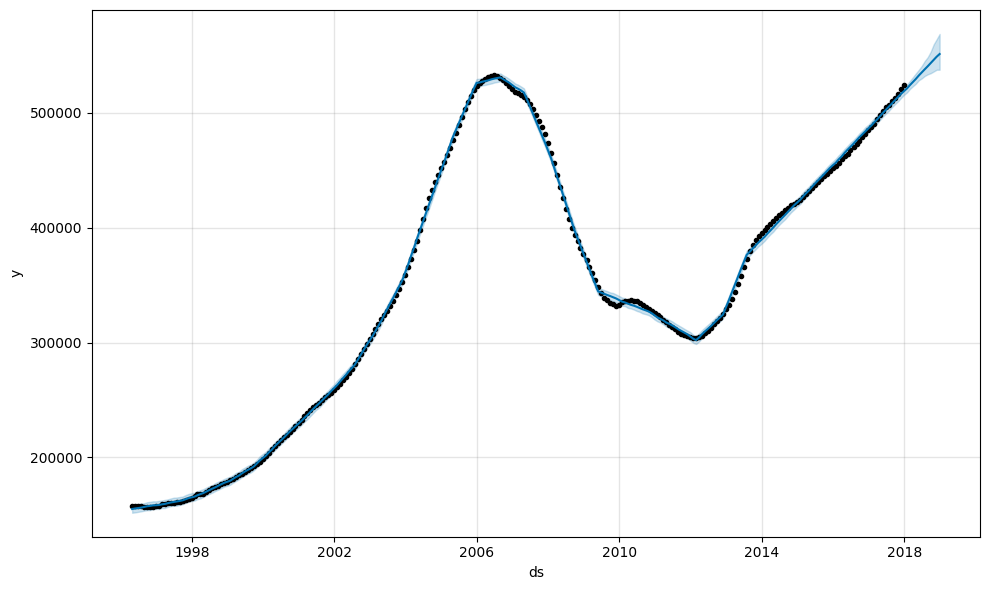

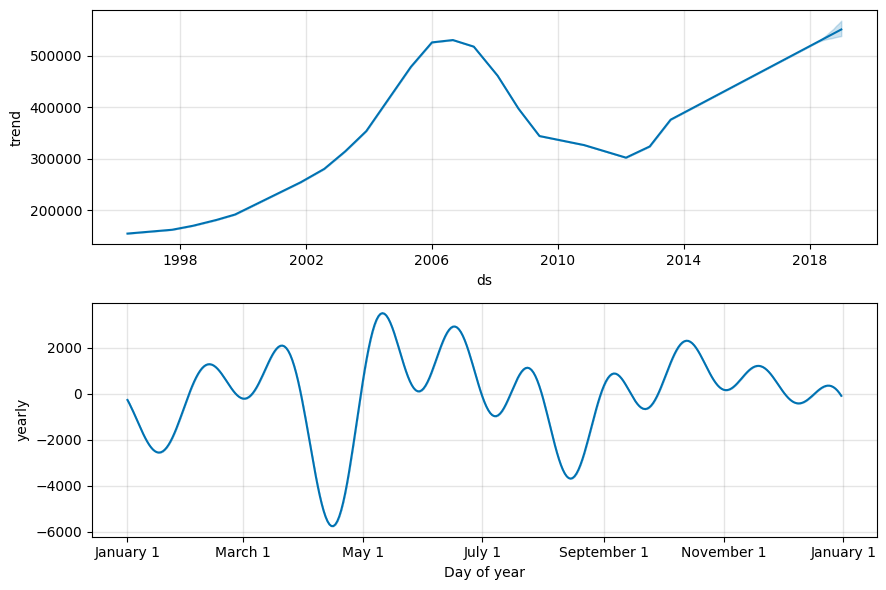

In [ ]:
fig = model_for_region.plot(forecast_region)
fig2 = model_for_region.plot_components(forecast_region)